### Part 2, Pandas

In [ ]:
# http://pandas-docs.github.io/pandas-docs-travis/api.html

In [2]:
import numpy as np
import pandas as pd

### Pandas Objects: Series, DataFrame

#### Series - one-dimensional array of indexed data

In [ ]:
# pd.Series(data, index=index) - constructing Series objects

In [23]:
data = pd.Series([1,2,3,4])
data

0    1
1    2
2    3
3    4
dtype: int64

In [24]:
print(data.values)
print (type(data.values))

[1 2 3 4]
<class 'numpy.ndarray'>


In [25]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [37]:
data = pd.Series([1,2,3,4], index = ('a','b','c','d'))
data

a    1
b    2
c    3
d    4
dtype: int64

In [45]:
# explicit and implicit index
print(data['a'])
data[0]

1


1

In [ ]:
Series from a Python dictionary

In [3]:
population_dict = {'California': 38332521,
                  'Texas': 26448193,
                  'New York': 19651127,
                  'Florida': 19552860,
                  'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [46]:
# explicit and implicit index
print(population['California'])
population[0]

38332521


38332521

#### DataFrame

In [ ]:
# Constracting df from a single Series object

In [47]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Florida,19552860
Illinois,12882135
New York,19651127
Texas,26448193


In [ ]:
# Constracting df from a dictionary of Series objects

In [4]:
area_dict = {'California': 423967, 'New York': 141297,
           'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Florida       170312
Illinois      149995
New York      141297
dtype: int64

In [5]:
cities= pd.DataFrame({'population': population,
             'area': area})
cities

,area,population
California,423967.0,38332521
Florida,170312.0,19552860
Illinois,149995.0,12882135
New York,141297.0,19651127
Texas,NaN,26448193


In [ ]:
# Constracting df from a two-dimensional NumPy array

In [52]:
np.random.seed(0)
pd.DataFrame(np.random.rand(3, 2),
            columns=['c1', 'c2'],
            index=['r1', 'r2', 'r3'])

,c1,c2
r1,0.548814,0.715189
r2,0.602763,0.544883
r3,0.423655,0.645894


#### Data indexing and selecting

In [ ]:
# NumPy - indexing (e.g., arr[2, 1]), slicing (e.g., arr[:, 1:5]), 
# masking (e.g., arr[arr > 0]), fancy indexing (e.g., arr[0, [1, 5]]), 
# and combinations thereof (e.g., arr[:, [1, 5]])

#### Indexing and selecting in Series

In [ ]:
# explicit (явный) index, implicit (неявный) integer index

In [ ]:
# Confusion: if Series has an explicit integer index, 
# an indexing operation such as data[1] will use the explicit indices, 
# while a slicing operation like data[1:3] will use the implicit index.

In [2]:
x = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
x

1    a
3    b
5    c
dtype: object

In [3]:
x[1]

'a'

In [4]:
x[1:3]

3    b
5    c
dtype: object

In [ ]:
# Indexers: loc, iloc
# loc attribute - indexing and slicing with the explicit index
# iloc attribute - indexing and slicing with the implicit index

# Principle of Python code: "explicit is better than implicit"

In [5]:
x.loc[1]

'a'

In [6]:
x.loc[1:3]

1    a
3    b
dtype: object

In [ ]:
# When slicing with an explicit inde, the final index is included in the slice, 
# while when slicing with an implicit index, the final index is excluded from the slice.

#### Indexing and selecting in df

In [67]:
cities

,area,population
California,423967.0,38332521
Florida,170312.0,19552860
Illinois,149995.0,12882135
New York,141297.0,19651127
Texas,NaN,26448193


In [7]:
# Population of Florida?
cities.loc['Florida', 'population']

19552860

In [ ]:
# df['column'], df.column

In [68]:
cities['area']

California    423967.0
Florida       170312.0
Illinois      149995.0
New York      141297.0
Texas              NaN
Name: area, dtype: float64

In [69]:
cities.area

California    423967.0
Florida       170312.0
Illinois      149995.0
New York      141297.0
Texas              NaN
Name: area, dtype: float64

In [12]:
# Slice: rows from the beginning to 'Illinois',
# columns in a changed order - 'population', 'area'
cities.loc[:'Illinois', :'population']

,area,population
California,423967.0,38332521
Florida,170312.0,19552860
Illinois,149995.0,12882135


In [13]:
cities.loc[:'Illinois', ::-1]

,population,area
California,38332521,423967.0
Florida,19552860,170312.0
Illinois,12882135,149995.0


In [76]:
# Add new column
cities['density'] = cities['population'] / cities['area']
cities

,area,population,density,test
California,423967.0,38332521,90.413926,
Florida,170312.0,19552860,114.806121,
Illinois,149995.0,12882135,85.883763,
New York,141297.0,19651127,139.076746,
Texas,NaN,26448193,NaN,


In [17]:
# Filter rows with 'density' > 100 and select columns 'density' and 'population'

In [85]:
cities.loc[cities['density'] > 100, ['population', 'density']]

,population,density
Florida,19552860,114.806121
New York,19651127,139.076746


In [87]:
# cities.T
cities.T

,California,Florida,Illinois,New York,Texas
area,423967,170312,149995,141297,NaN
population,38332521,19552860,12882135,19651127,26448193
density,90.4139,114.806,85.8838,139.077,NaN
test,,,,,


#### Handling missing data

In [ ]:
# NaN: Missing numerical data

In [ ]:
# Operating on Null Values: .isnull(), .notnull(), .dropna(), .fillna()

In [ ]:
# Detecting null values

In [91]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [92]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [93]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [ ]:
# Dropping null values

In [94]:
# Series
data.dropna()

0        1
2    hello
dtype: object

In [95]:
# df
df = pd.DataFrame([[1,      np.nan, 2, np.nan],
                 [2,      3,      5, np.nan],
                 [np.nan, 4,      6, np.nan]])
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [ ]:
# axis='rows' or omitted - drop rows with any null value 
# axis='columns' - drop columns with any null value 

In [96]:
df.dropna()

,0,1,2,3


In [97]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [98]:
# how ='all'- will only drop rows/columns that are all null values
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [ ]:
# Filling null values

In [99]:
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [100]:
data.fillna(0)

0        1
1        0
2    hello
3        0
dtype: object

In [101]:
# forward-fill
data.fillna(method='ffill')

0        1
1        1
2    hello
3    hello
dtype: object

In [102]:
# back-fill
data.fillna(method='bfill')

0        1
1    hello
2    hello
3     None
dtype: object

In [103]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [107]:
# columns: axis = 0, rows: axis = 1 
df.fillna(method='ffill', axis= 0)

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,2.0,4.0,6,NaN


In [ ]:
# MDB dataset

In [11]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None, encoding='utf-8')
titles = titles[titles['year'] <= 2015]
titles.head()

,title,year
0,Berlian si Etty,2013
1,The Mighty,1929
2,Little Black Spiders,2012
3,Twelve O'Clock High,1949
4,D4,2011


In [ ]:
# Don't run!!!
# cast = pd.read_csv('data/cast_full.csv')
# cast = cast[cast['year'] <= 1990]
# cast.to_csv('data/cast.csv', index = False)

In [3]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Natas es Satan,1977,Ramon 'Cartucho' Pena,actor,Nigth Club Owner,NaN
2,Los tarantos,1963,'El Guisa',actor,Bailaor,25.0
3,Los tarantos,1963,'El Viti',actor,Cantaor,20.0
4,Been Down So Long It Looks Like Up to Me,1971,Murray the 'K',actor,Himself,NaN


In [ ]:
#  .head(), .tail(), len()

In [117]:
# How many movies are listed in the titles dataframe?
len(titles)

245126

In [ ]:
# What are the earliest two films listed in the titles dataframe?

In [112]:
# Sort_values for df
titles.sort_values('year').head(2)

,title,year
94265,Miss Jerry,1894
97890,The Startled Lover,1898


In [ ]:
# From a year to decade


In [12]:
(titles['year'] // 10 *10)[0:10]

0     2010
1     1920
2     2010
3     1940
4     2010
5     1970
7     1910
8     1950
9     2000
10    1980
Name: year, dtype: int64

In [ ]:
# How many people have played an "Ophelia"?
# .unique()

In [9]:
len(cast[cast.character == 'Ophelia'].name.unique())

30

In [ ]:
# ready for exercise 1

In [ ]:
# Operations with string

In [13]:
h = cast.head(10)
h

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Natas es Satan,1977,Ramon 'Cartucho' Pena,actor,Nigth Club Owner,NaN
2,Los tarantos,1963,'El Guisa',actor,Bailaor,25.0
3,Los tarantos,1963,'El Viti',actor,Cantaor,20.0
4,Been Down So Long It Looks Like Up to Me,1971,Murray the 'K',actor,Himself,NaN
5,I Wanna Hold Your Hand,1978,Murray the 'K',actor,Himself,48.0
6,That's the Way of the World,1975,Murray the 'K',actor,Big John Little,22.0
7,In the Land of the Head Hunters,1914,Paddy 'Malid,actor,Kenada,5.0
8,Los tarantos,1963,'Morita',actor,Cantaor,18.0
9,Los tarantos,1963,'Pucherete',actor,Guitarist,14.0


In [14]:
x = h[h['title'].str.startswith('Los')]['title']
x
# x.loc[7], x.iloc[0]

2    Los tarantos
3    Los tarantos
8    Los tarantos
9    Los tarantos
Name: title, dtype: object

In [123]:
h.title.str.len()

0    14
1    15
2    19
3    20
4    10
5    22
6    22
7    14
8    49
9    12
Name: title, dtype: int64

In [ ]:
# How many times each item appears?
# .value_counts()

In [ ]:
# How many films were released each year?

In [15]:
t = titles.year.value_counts()
t.head(10)

2015    8696
2014    8260
2013    7883
2012    7393
2011    6982
2010    6409
2009    6125
2008    5145
2007    4462
2006    4289
Name: year, dtype: int64

In [16]:
%matplotlib inline

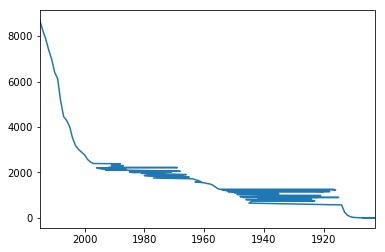

In [17]:
t.plot();

In [ ]:
# what a problem with the plot? 
# Series sorted by the frequency, not by the index - year

# .sort_index()

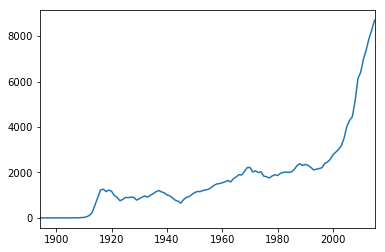

In [18]:
t = t.sort_index()
t.plot();

In [19]:
c = cast
c = c[c.character == 'Kermit the Frog']
c.head()

,title,year,name,type,character,n
417908,An American Werewolf in London,1981,Jim Henson,actor,Kermit the Frog,18.0
417909,Follow That Bird,1985,Jim Henson,actor,Kermit the Frog,2.0
417914,The Great Muppet Caper,1981,Jim Henson,actor,Kermit the Frog,1.0
417922,The Muppet Movie,1979,Jim Henson,actor,Kermit the Frog,1.0
417929,The Muppets Take Manhattan,1984,Jim Henson,actor,Kermit the Frog,1.0


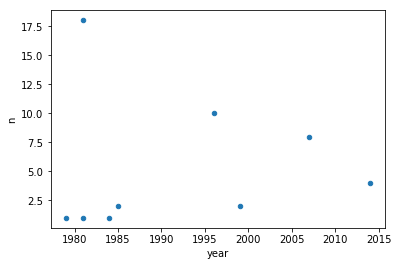

In [147]:
c.plot(x='year', y='n', kind ='scatter');

In [ ]:
# ready for exercise 2

In [ ]:
# .groupby()

In [ ]:
# How many films have been released each year in the history of cinema?

In [20]:
# each year
t =titles
t.groupby('year').size().head(10)

year
1894     1
1898     1
1899     1
1900     5
1903     1
1905     2
1906     5
1907     4
1908     6
1909    16
dtype: int64

In [21]:
# each decade
g = t.groupby(c['year']//10*10).size()
g.head(10)

Series([], dtype: int64)

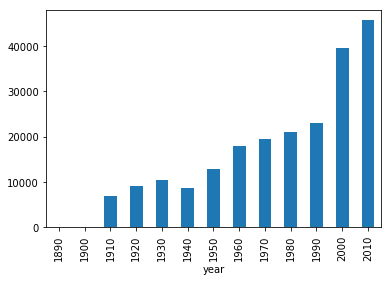

In [15]:
# plot the number of films
g.plot(kind = 'bar');

In [22]:
# How many actors and actresses roles each year?
c = cast
g = c.groupby(['year', 'type']).size()
g.head()

year  type   
1894  actor       2
      actress     1
1900  actor       2
1905  actor       1
1906  actor      14
dtype: int64

In [ ]:
# ready for exercise 3

In [34]:
# How to compare actors and actresses?

In [23]:
# .unstack()
u = g.unstack('type').fillna(0) 
u.head()

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,0.0
1905,1.0,0.0
1906,14.0,3.0
1907,5.0,0.0


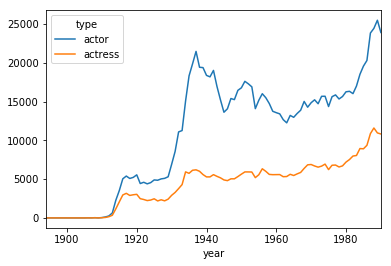

In [24]:
u.plot();

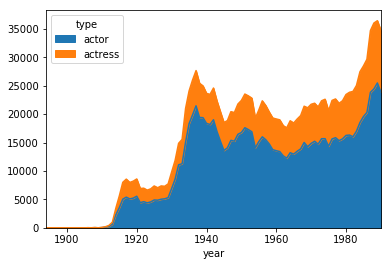

In [25]:
u.plot(kind='area');

In [26]:
u.stack().head()

year  type   
1894  actor      2.0
      actress    1.0
1900  actor      2.0
      actress    0.0
1905  actor      1.0
dtype: float64

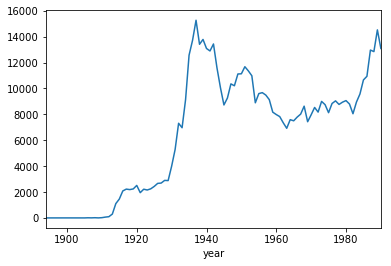

In [27]:
(u['actor'] - u['actress']).plot();

In [ ]:
# fraction of 'actor' roles: 
# (c.actor/(c.actor+c.actress)).plot(ylim=[0,1])

In [ ]:
# ready for exercise 4

In [29]:
release_dates =  pd.read_csv('data/release_dates.csv', parse_dates=['date'])
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [30]:
c = cast
c =c[c.name == 'Harold Miller']
c.head()

,title,year,name,type,character,n
650871,'Fun on a Week-End',1947,Harold Miller,actor,Nightclub Patron,NaN
650872,40 Pounds of Trouble,1962,Harold Miller,actor,Casino Patron,NaN
650873,7th Cavalry,1956,Harold Miller,actor,Officer at Inquiry,NaN
650874,A Blueprint for Murder,1953,Harold Miller,actor,Lynn's Lawyer,NaN
650875,A Date with Judy,1948,Harold Miller,actor,Rumba Dancer,NaN


In [ ]:
# .merge()

# There are other commands to joint related tables, but 'merge' is a general one.
# A good and a short reading about ‘merge’ is chapter ‘03.07-Merge-and-Join’ in 
# Python Data Science Handbook by Jake VanderPlas. 
# Book is available github.com/tensorby/homework in lecture_1/book.

In [31]:
c.merge(release_dates)

,title,year,name,type,character,n,country,date
0,'Fun on a Week-End',1947,Harold Miller,actor,Nightclub Patron,NaN,USA,1947-05-15
1,'Fun on a Week-End',1947,Harold Miller,actor,Nightclub Patron,NaN,UK,1947-06-30
2,'Fun on a Week-End',1947,Harold Miller,actor,Nightclub Patron,NaN,Portugal,1949-02-23
3,'Fun on a Week-End',1947,Harold Miller,actor,Nightclub Patron,NaN,Finland,1951-06-29
4,40 Pounds of Trouble,1962,Harold Miller,actor,Casino Patron,NaN,USA,1962-12-31
5,40 Pounds of Trouble,1962,Harold Miller,actor,Casino Patron,NaN,West Germany,1963-04-04
6,40 Pounds of Trouble,1962,Harold Miller,actor,Casino Patron,NaN,Finland,1963-04-12
7,40 Pounds of Trouble,1962,Harold Miller,actor,Casino Patron,NaN,Mexico,1963-04-18
8,40 Pounds of Trouble,1962,Harold Miller,actor,Casino Patron,NaN,France,1963-06-19
9,40 Pounds of Trouble,1962,Harold Miller,actor,Casino Patron,NaN,Denmark,1963-06-21
